## Euler method for solution of well-posed IVP

To solve the IVP 

\begin{align*}
\dfrac{dy}{dt} & = f(t, y), \quad \quad t \in [a,b] \\
y(a) & = \alpha
\end{align*}

We use equally spaced mesh points $t_i = a + i h$, with $h = (b-a)/N = (t_{i+1} - t_i)$ and use Taylor approximation

$$
y(t_{i+1}) = y(t_{i}) + hf(t_i, y(t_i)) + \dfrac{h^2}{2}y^{\prime\prime}(\xi_i),
$$

to generate the following sequence of approximations:

\begin{align*}
w_0 & = \alpha \\
w_{i+1} & = w_{i} + hf(t_i, w_i)
\end{align*}

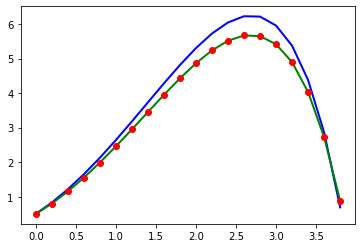

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def euler(a, b, alpha, n, f):
    h = (b-a) / n
    t = np.zeros(n)
    w = np.zeros(n)
    t[0] = a
    w[0] = alpha
    
    for i in range(1,n):
        t[i] = a + i * h
        w[i] = w[i-1] + h * f(t[i-1], w[i-1])
    
    
    return t, w

def f(t, y):
    return y - t ** 2 + 1

def y(t):
    return (t+1)**2 - 0.5 * np.exp(t)

a = 0
b = 4
alpha = 0.5
n = 20

t, w = euler(a, b, alpha, n, f)
y_exact = y(t) 

fig, ax = plt.subplots() 
    
    
ax.plot(t, y_exact, color = 'blue', lw = 2, ls = '-')
ax.plot(t, w, color = 'green', lw = 2, ls = '-')
ax.plot(t, w, color = "red", marker = 'o', ls = '')

In [4]:
## Higher Order Taylor T^2
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return y - t ** 2 + 1

def fp(t, y):
    return  -2 * t + y - t**2 + 1

def y(t):
    return (t+1)**2 - 0.5 * np.exp(t)

def Euler(a, b, alpha, N, f):
    h = (b - a) / N
    t = np.zeros(N)
    w = np.zeros(N)
    
    t[0] = a
    w[0] = alpha
    for i in range(1, N):
        t[i] = t[i-1] + h
        w[i] = w[i-1] + h * f(t[i-1], w[i-1])
    
    return t, w

def Taylor2(a, b, alpha, N, f, fp):
    h = (b - a) / N
    t = np.zeros(N)
    w = np.zeros(N)
    
    t[0] = a
    w[0] = alpha
    for i in range(1, N):
        t[i] = t[i-1] + h
        w[i] = w[i-1] + h * (f(t[i-1], w[i-1]) + (h/2) * fp(t[i-1], w[i-1]))
    
    return t, w

In [5]:
a = 0
b = 4
alpha = 0.5
N = 20

t, w1 = Euler(a, b, alpha, N, f)
t, w2 = Taylor2(a, b, alpha, N, f, fp)

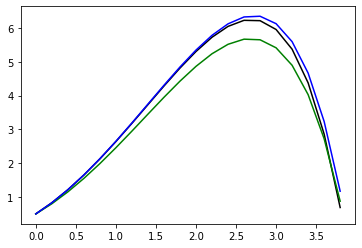

In [6]:
fig, ax = plt.subplots()

ax.plot(t, y(t), color = 'black', ls = '-')
ax.plot(t, w1, color = 'green', ls = '-')
ax.plot(t, w2, color = 'blue', ls = '-')

In [7]:
## Higher order Taylor: T^2(t,y)
## Using TensorFlow
import tensorflow as tf
import numpy as np


def f(t0, y0):
    return y0 - t0 ** 2 + 1

a = 0.0
b = 4.0
alpha = 0.5
n = 20

t = tf.Variable(a)
y = tf.Variable(alpha)


h = (b-a) / n
t_np = np.zeros(n)
w_np = np.zeros(n)
t_np[0] = a
w_np[0] = alpha
    
for i in range(1,n):
    t.assign(t_np[i-1])
    y.assign(w_np[i-1])
    with tf.GradientTape() as tp: 
        dy_dt = y - t ** 2 + 1
    ddy_ddt = tp.gradient(dy_dt, [t, y])
    sec_term = ddy_ddt[0].numpy() + ddy_ddt[1].numpy() * f(t_np[i-1], w_np[i-1])
    
    t_np[i] = a + i * h
    w_np[i] = w_np[i-1] + h * f(t_np[i-1], w_np[i-1]) + ((h**2)/2) * sec_term



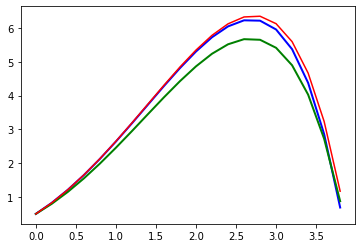

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 

ax.plot(t_np, y_exact, color = 'blue', lw = 2, ls = '-')
ax.plot(t_np, w, color = 'green', lw = 2, ls = '-')
ax.plot(t_np, w_np, color = "red", ls = '-')